In [4]:
# Tanawat Panitpongsri UID 706306642

# ECON425T Homework 3

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo
import patsy as pt
import statsmodels.stats.api as sms
from simple_colors import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import minimize_scalar
from sklearn.linear_model import LassoCV, RidgeCV

# Problem 1

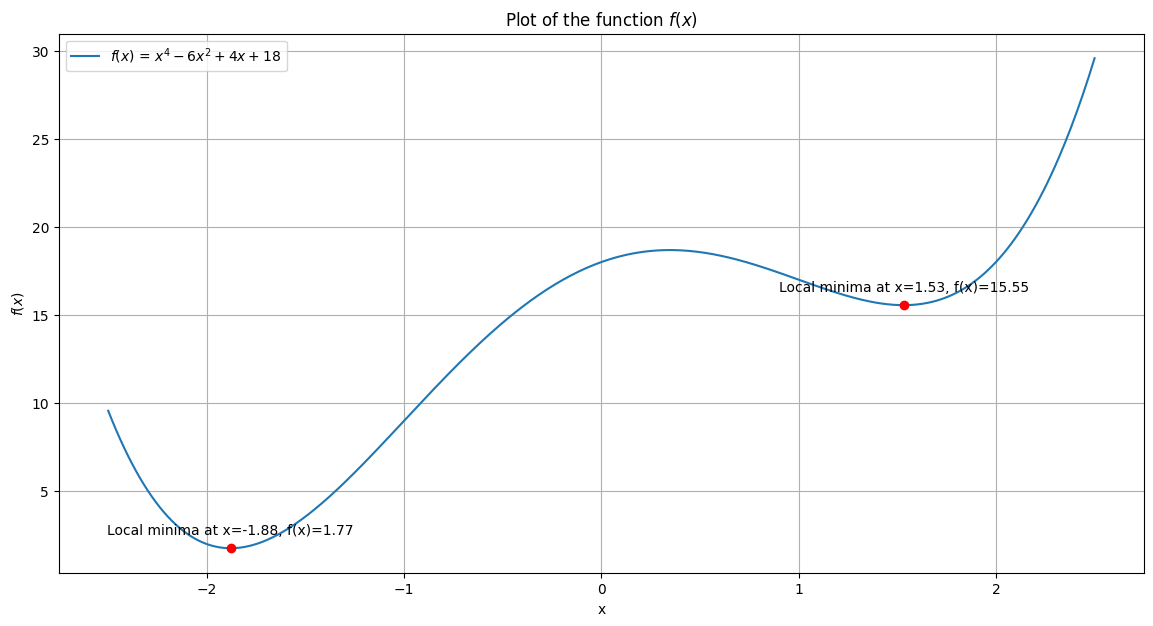

In [6]:
# Define the function
def f(x):
    return x**4 - 6*x**2 + 4*x + 18

# Generate x values from -2.5 to 2.5
x = np.linspace(-2.5, 2.5, 500)
y = f(x)

# Plot the function
plt.figure(figsize=(14, 7))
plt.plot(x, y, label='$f(x)$ = $x^4 - 6x^2 + 4x + 18$')
plt.title('Plot of the function $f(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)

# Find the local minima
# We will look for minima in two intervals: [-2.5, 0] and [0, 2.5] to find the local minima
minima_1 = minimize_scalar(f, bounds=(-2.5, 0), method='bounded')
minima_2 = minimize_scalar(f, bounds=(0, 2.5), method='bounded')

# Annotate the found local minima on the plot
plt.scatter(minima_1.x, minima_1.fun, color='red', zorder=5)
plt.scatter(minima_2.x, minima_2.fun, color='red', zorder=5)
plt.annotate(f'Local minima at x={minima_1.x:.2f}, f(x)={minima_1.fun:.2f}', 
             (minima_1.x, minima_1.fun), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate(f'Local minima at x={minima_2.x:.2f}, f(x)={minima_2.fun:.2f}', 
             (minima_2.x, minima_2.fun), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

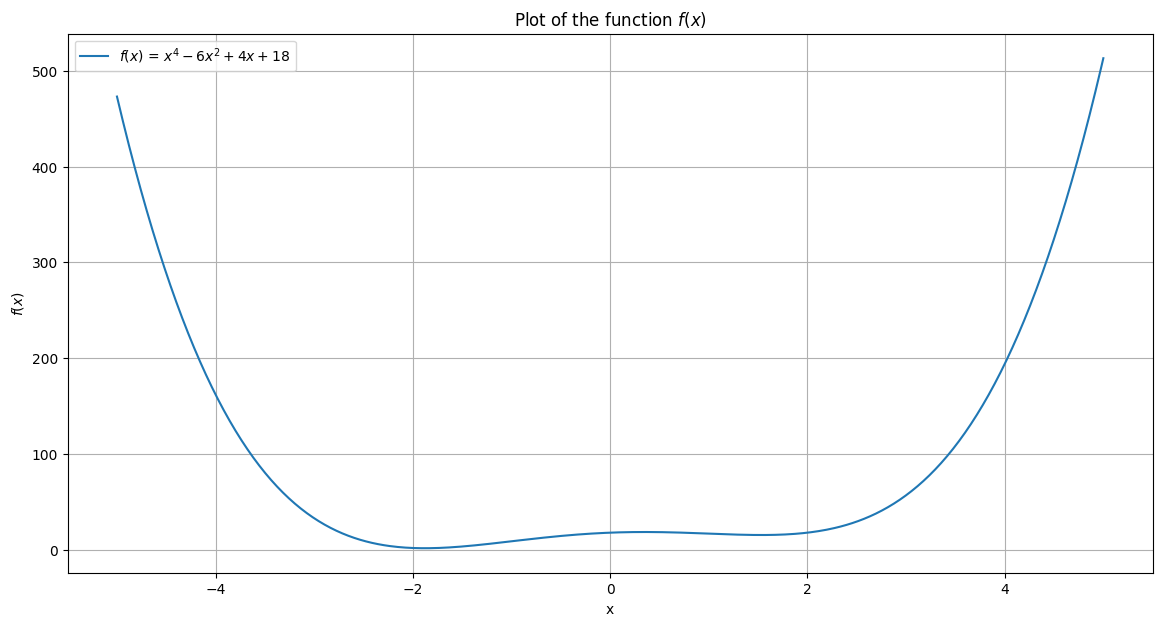

In [7]:
# Define the function
def f(x):
    return x**4 - 6*x**2 + 4*x + 18

# Generate x values from -2.5 to 2.5
x = np.linspace(-5, 5, 500)
y = f(x)

# Plot the function
plt.figure(figsize=(14, 7))
plt.plot(x, y, label='$f(x)$ = $x^4 - 6x^2 + 4x + 18$')
plt.title('Plot of the function $f(x)$')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

## 1(iii)
From the first graph, I found 2 local minima at x = -1.88 and 1.53; f(-1.88) = 1.77 and f(1.53) = 15.55. I had tried plotting a wider range of f(x) and could not find additional decreasing trends and other minima. Hence, f(-1.88) = 1.77 should be global minima.

In [8]:
# Parameters for the gradient descent
x_0 = 1  # Starting value of x
alpha = 0.1  # Learning rate
s_steps = 3  # Number of steps to run the gradient descent

# Define the derivative of the function
def f_diff(x):
    return 4*x**3 - 12*x + 4

# Gradient Descent function
def gradient_descent(f_diff, x_0, alpha, s_steps):
    x = x_0
    x_record = [x]  # To keep track of x values over steps
    for i in range(s_steps):
        # Calculate the gradient (derivative) at the current x
        GD = f_diff(x)
        # Update x by taking a "step" in the direction of the steepest descent
        x = x - alpha * GD
        # Save the updated x value
        x_record.append(x)
    return x_record

# Run gradient descent
x_record = gradient_descent(f_diff, x_0, alpha, s_steps)

for i, x in enumerate(x_record):
    print(f"Step {i}: x = {x:.5f}")


Step 0: x = 1.00000
Step 1: x = 1.40000
Step 2: x = 1.58240
Step 3: x = 1.49635


## 1(iv)
From my function above, I got the same results as calculated shown in part 1(i), 1(ii).

In [9]:
# Parameters for the gradient descent
x_0 = 1  # Starting value of x
alpha = 0.1  # Learning rate
s_steps = 20  # Number of steps to run the gradient descent

# Define the derivative of the function
def f_diff(x):
    return 4*x**3 - 12*x + 4

# Gradient Descent function
def gradient_descent(f_diff, x_0, alpha, s_steps):
    x = x_0
    x_record = [x]  # To keep track of x values over steps
    for i in range(s_steps):
        # Calculate the gradient (derivative) at the current x
        GD = f_diff(x)
        # Update x by taking a "step" in the direction of the steepest descent
        x = x - alpha * GD
        # Save the updated x value
        x_record.append(x)
    return x_record

# Run gradient descent
x_record = gradient_descent(f_diff, x_0, alpha, s_steps)

for i, x in enumerate(x_record):
    print(f"Step {i}: x = {x:.5f}")


Step 0: x = 1.00000
Step 1: x = 1.40000
Step 2: x = 1.58240
Step 3: x = 1.49635
Step 4: x = 1.55180
Step 5: x = 1.51922
Step 6: x = 1.53972
Step 7: x = 1.52727
Step 8: x = 1.53502
Step 9: x = 1.53027
Step 10: x = 1.53321
Step 11: x = 1.53140
Step 12: x = 1.53251
Step 13: x = 1.53183
Step 14: x = 1.53225
Step 15: x = 1.53199
Step 16: x = 1.53215
Step 17: x = 1.53205
Step 18: x = 1.53211
Step 19: x = 1.53207
Step 20: x = 1.53210


In [10]:
# Parameters for the gradient descent
x_0 = 0  # Starting value of x
alpha = 0.1  # Learning rate
s_steps = 20  # Number of steps to run the gradient descent

# Define the derivative of the function
def f_diff(x):
    return 4*x**3 - 12*x + 4

# Gradient Descent function
def gradient_descent(f_diff, x_0, alpha, s_steps):
    x = x_0
    x_record = [x]  # To keep track of x values over steps
    for i in range(s_steps):
        # Calculate the gradient (derivative) at the current x
        GD = f_diff(x)
        # Update x by taking a "step" in the direction of the steepest descent
        x = x - alpha * GD
        # Save the updated x value
        x_record.append(x)
    return x_record

# Run gradient descent
x_record = gradient_descent(f_diff, x_0, alpha, s_steps)

for i, x in enumerate(x_record):
    print(f"Step {i}: x = {x:.5f}")


Step 0: x = 0.00000
Step 1: x = -0.40000
Step 2: x = -1.25440
Step 3: x = -2.37015
Step 4: x = -0.28849
Step 5: x = -1.02508
Step 6: x = -2.22432
Step 7: x = -0.89149
Step 8: x = -2.07787
Step 9: x = -1.38281
Step 10: x = -2.38452
Step 11: x = -0.22266
Step 12: x = -0.88543
Step 13: x = -2.07028
Step 14: x = -1.40527
Step 15: x = -2.38155
Step 16: x = -0.23634
Step 17: x = -0.91468
Step 18: x = -2.10619
Step 19: x = -1.29636
Step 20: x = -2.38055


## 1(v)
From 20 steps of calculation, I found the convergence toward 1.53 if 1 is a starting point while the convergence is not found when starting the calculation from 0.

In [11]:
# Parameters for the gradient descent
x_0 = 1  # Starting value of x
alpha = 0.01  # Learning rate
s_steps = 50  # Number of steps to run the gradient descent

# Define the derivative of the function
def f_diff(x):
    return 4*x**3 - 12*x + 4

# Gradient Descent function
def gradient_descent(f_diff, x_0, alpha, s_steps):
    x = x_0
    x_record = [x]  # To keep track of x values over steps
    for i in range(s_steps):
        # Calculate the gradient (derivative) at the current x
        GD = f_diff(x)
        # Update x by taking a "step" in the direction of the steepest descent
        x = x - alpha * GD
        # Save the updated x value
        x_record.append(x)
    return x_record

# Run gradient descent
x_record = gradient_descent(f_diff, x_0, alpha, s_steps)

for i, x in enumerate(x_record):
    print(f"Step {i}: x = {x:.5f}")


Step 0: x = 1.00000
Step 1: x = 1.04000
Step 2: x = 1.07981
Step 3: x = 1.11902
Step 4: x = 1.15725
Step 5: x = 1.19413
Step 6: x = 1.22932
Step 7: x = 1.26252
Step 8: x = 1.29353
Step 9: x = 1.32218
Step 10: x = 1.34838
Step 11: x = 1.37213
Step 12: x = 1.39345
Step 13: x = 1.41244
Step 14: x = 1.42922
Step 15: x = 1.44395
Step 16: x = 1.45680
Step 17: x = 1.46794
Step 18: x = 1.47757
Step 19: x = 1.48584
Step 20: x = 1.49293
Step 21: x = 1.49898
Step 22: x = 1.50414
Step 23: x = 1.50851
Step 24: x = 1.51222
Step 25: x = 1.51536
Step 26: x = 1.51801
Step 27: x = 1.52025
Step 28: x = 1.52214
Step 29: x = 1.52373
Step 30: x = 1.52507
Step 31: x = 1.52620
Step 32: x = 1.52714
Step 33: x = 1.52794
Step 34: x = 1.52861
Step 35: x = 1.52917
Step 36: x = 1.52964
Step 37: x = 1.53003
Step 38: x = 1.53036
Step 39: x = 1.53064
Step 40: x = 1.53088
Step 41: x = 1.53107
Step 42: x = 1.53124
Step 43: x = 1.53137
Step 44: x = 1.53149
Step 45: x = 1.53159
Step 46: x = 1.53167
Step 47: x = 1.53174
St

In [12]:
# Parameters for the gradient descent
x_0 = 0  # Starting value of x
alpha = 0.01  # Learning rate
s_steps = 50  # Number of steps to run the gradient descent

# Define the derivative of the function
def f_diff(x):
    return 4*x**3 - 12*x + 4

# Gradient Descent function
def gradient_descent(f_diff, x_0, alpha, s_steps):
    x = x_0
    x_record = [x]  # To keep track of x values over steps
    for i in range(s_steps):
        # Calculate the gradient (derivative) at the current x
        GD = f_diff(x)
        # Update x by taking a "step" in the direction of the steepest descent
        x = x - alpha * GD
        # Save the updated x value
        x_record.append(x)
    return x_record

# Run gradient descent
x_record = gradient_descent(f_diff, x_0, alpha, s_steps)

for i, x in enumerate(x_record):
    print(f"Step {i}: x = {x:.5f}")


Step 0: x = 0.00000
Step 1: x = -0.04000
Step 2: x = -0.08480
Step 3: x = -0.13495
Step 4: x = -0.19104
Step 5: x = -0.25369
Step 6: x = -0.32348
Step 7: x = -0.40094
Step 8: x = -0.48648
Step 9: x = -0.58025
Step 10: x = -0.68207
Step 11: x = -0.79122
Step 12: x = -0.90636
Step 13: x = -1.02534
Step 14: x = -1.14526
Step 15: x = -1.26260
Step 16: x = -1.37360
Step 17: x = -1.47477
Step 18: x = -1.56344
Step 19: x = -1.63819
Step 20: x = -1.69892
Step 21: x = -1.74664
Step 22: x = -1.78310
Step 23: x = -1.81030
Step 24: x = -1.83023
Step 25: x = -1.84462
Step 26: x = -1.85492
Step 27: x = -1.86222
Step 28: x = -1.86737
Step 29: x = -1.87099
Step 30: x = -1.87352
Step 31: x = -1.87530
Step 32: x = -1.87653
Step 33: x = -1.87740
Step 34: x = -1.87800
Step 35: x = -1.87842
Step 36: x = -1.87871
Step 37: x = -1.87892
Step 38: x = -1.87906
Step 39: x = -1.87916
Step 40: x = -1.87923
Step 41: x = -1.87928
Step 42: x = -1.87931
Step 43: x = -1.87933
Step 44: x = -1.87935
Step 45: x = -1.87936

## 1(vi)
If lower the learning rate alpha (10 times) to 0.01, the calculation will reach the convergence slower. From the calculation above, I found the convergence in both cases, however, they need more than 20 steps of calculation to reach  the convergence.

# Problem 2

In [13]:
#read data
df = pd.read_csv("College.csv")
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [14]:
# Split the dataset into features and target variable ('Apps')

df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})

X = df.drop('Apps', axis=1)  
y = df['Apps']  

# Split the dataset into training and test sets
# First 600 observations for the training set
X_train = X.iloc[:600]
y_train = y.iloc[:600]

# The remaining 177 observations for the test set
X_test = X.iloc[600:]
y_test = y.iloc[600:]

# Recheck the split
print(X_train.shape[0])
print(X_test.shape[0])

600
177


## 2(i)
The two numbers above confirmed that the data was splited to training set and testing set correctly.

In [15]:
# Train the model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict y
y_pred = linear_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print(f"The Mean Squared Error on the test set is: {mse}")

The Mean Squared Error on the test set is: 1502077.4348215673


In [21]:
# Get the coefficients
linear_coef = linear_model.coef_

# Get the feature names from the X_train DataFrame
feature_names = X_train.columns

# Create a DataFrame of features and their corresponding coefficients from the linear model
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': linear_coef
})

# Display the DataFrame
print(coef_df)

        Feature  Coefficient
0       Private  -493.454151
1        Accept     1.723384
2        Enroll    -1.227158
3     Top10perc    40.864534
4     Top25perc   -10.403318
5   F.Undergrad     0.064126
6   P.Undergrad    -0.001202
7      Outstate    -0.099237
8    Room.Board     0.146274
9         Books     0.097640
10     Personal     0.042634
11          PhD    -6.814104
12     Terminal    -3.956828
13    S.F.Ratio    23.635474
14  perc.alumni     1.939226
15       Expend     0.104748
16    Grad.Rate     5.727097


## 2(ii)
Linear model Test Error: 1502077.4348215673

In [16]:
# Gen alpha parameters for LASSO and Ridge
alphas = np.linspace(0.01, 60, 1000)

# Fit LASSO regression, 20-fold cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=20, random_state=0).fit(X_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test))
print(f"LASSO Test Error: {lasso_mse}")

LASSO Test Error: 1502356.4555399297


In [22]:
# Get the coefficients from the lasso model
lasso_coef = lasso_cv.coef_

# Get the feature names from the X_train DataFrame
feature_names = X_train.columns

# Create a DataFrame of features and their corresponding coefficients from the LASSO model
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coef
})

# Display the features with non-zero coefficients
non_zero_coef = coef_df[coef_df['Coefficient'] != 0]
print(non_zero_coef)


        Feature  Coefficient
0       Private  -433.949998
1        Accept     1.723802
2        Enroll    -1.229654
3     Top10perc    40.660339
4     Top25perc   -10.312793
5   F.Undergrad     0.066432
6   P.Undergrad    -0.000324
7      Outstate    -0.102111
8    Room.Board     0.144434
9         Books     0.094595
10     Personal     0.041424
11          PhD    -6.621070
12     Terminal    -3.656215
13    S.F.Ratio    24.111370
14  perc.alumni     1.730989
15       Expend     0.105309
16    Grad.Rate     5.717465


## 2(iii)
LASSO Test Error: 1502356.4555399297

In [13]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [14]:
# Fit Ridge regression, leave-one-out cross-validation
loo = LeaveOneOut()
ridge_cv = RidgeCV(alphas=alphas, cv=loo).fit(X_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge_cv.predict(X_test))
print(f"Ridge Test Error: {ridge_mse}")

Ridge Test Error: 1502076.8402164557


/Users/tanawatpanitpongsri/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan na

## 2(iv)
Ridge Test Error: 1502076.8402164557

## 2(v)
I found that the Ridge model gives the least testing error. This implies that Ridge has the best-predicting performance among the three models. However, the testing error performance of the three models is not different much, while the Ridge model needs more time to estimate. Hence, I prefer the Lasso or Linear model over the best performance model in this case.